# PCA(Principal Component Analysis) for Data Visualization

Its really helpful for us to visualize our data. Visualizing a 2D or a 3D data is not that challenging. However not all data are in those two dimensions. This is were PCA comes into play. We can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that we can plot and understand the data better.

### Load Iris Dataset

In [28]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Load the dataset to a dataframe

df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [29]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Standardize the data

PCA is effected by scale so we need to scale the features in the data before applying PCA. Using StandardScaler will help to standardize the dataset's features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [30]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating the features from df
x = df.loc[:, features]
print("BEFORE:")
print(x.head())
print("______________________________")
x = x.values

# Separating the targets from df
y = df.loc[:,['target']].values

# Standardizing features
x = StandardScaler().fit_transform(x)
z = pd.DataFrame(x,columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
print("AFTER:")
print(z.head())

BEFORE:
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
______________________________
AFTER:
   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


### PCA Projection to 2D

Here our data has 4 columns (sepal length, sepal width, petal length, petal width). Now we want to project those into 2D. 

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [32]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [34]:
finalDF = pd.concat([principalDf, df[['target']]],axis = 1)

In [35]:
finalDF.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Visualize the data

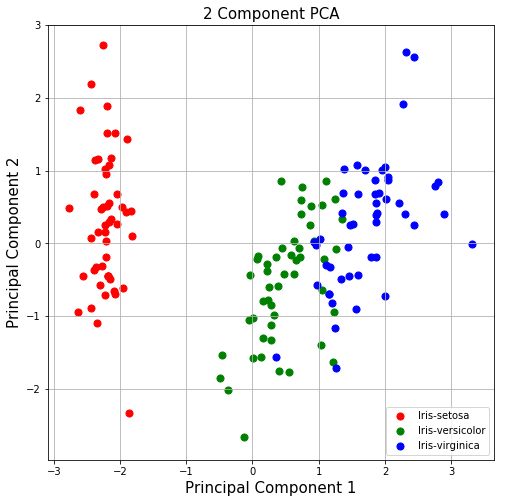

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
              finalDF.loc[indicesToKeep, 'principal component 2'],
              c = color,
              s = 50)
ax.legend(targets)
ax.grid()


### Explained Variance

It tells about how much information (variance) can be attributed to each of the principal components. Its important because while we convert 4 dimensional space to 2 dimensional space, we loose some of the variance (information). By using the attribute <b>explained_variance_ratio_</b>, we can see the first principal component contains 72.77% of the variance and the second principal component contains 23.03% fo the variance. Together, the two components contain 95.80% of the information.

In [46]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])